# Gradient Boost Methods Assignment

## Dataset Used - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


a) GBM Classifier Techniques

1. XGBoost
2. Catboost
3. LightGBM
4. Randomforest
5. Adaboost
6. Decision tree classifier


b) Showcase gradient boost regression techniques 
1. XGBoost
2. Catboost
3. LightGBM


In [1]:
! pip install catboost
! pip install yellowbrick

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [38]:
''' importing libraries '''

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.classifier import ConfusionMatrix

import lightgbm as lgb
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
import xgboost as xgb
import catboost as cb

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


### Dataset for Classification

In [39]:
''' loading dataset '''
breast_cancer_dataset = pd.read_csv("https://raw.githubusercontent.com/aryan-jadon/Gradient-Boost-Methods/main/Dataset/breast_cancer_data.csv")
breast_cancer_dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [40]:
''' Check the distribution of target variable'''
# check the distribution of the target variable
breast_cancer_dataset['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [41]:
X = breast_cancer_dataset[['mean_radius',
                           'mean_texture',
                           'mean_perimeter',
                           'mean_area',
                           'mean_smoothness']]

y = breast_cancer_dataset['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Dataset for Regression

In [42]:
''' loading dataset '''
boston_dataset = datasets.load_boston()
X_Reg = boston_dataset.data
y_Reg = boston_dataset.target

X_train_Reg, X_test_Reg, y_train_Reg, y_test_Reg = train_test_split(X_Reg, y_Reg, test_size=0.30)


### XGBoost Classifier



****************************************
XGBoost Classifier Model accuracy score: 0.8713
****************************************
Training-set accuracy score: 0.9899
****************************************
Training set score: 0.9899
Test set score: 0.8713
****************************************
Confusion matrix

 [[59 11]
 [11 90]]

True Positives(TP) =  59

True Negatives(TN) =  90

False Positives(FP) =  11

False Negatives(FN) =  11
****************************************
****************************************
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        70
           1       0.89      0.89      0.89       101

    accuracy                           0.87       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.87      0.87      0.87       171

****************************************


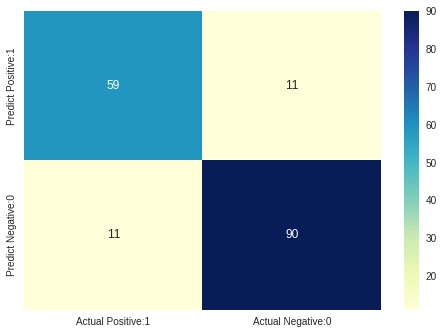

In [43]:
# build the model
clf = XGBClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("****************************************")
print('XGBoost Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print("****************************************")
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print("****************************************")
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)
print("****************************************")
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print("****************************************")

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print("****************************************")
print(classification_report(y_test, y_pred))
print("****************************************")

### XGBoost Regression

[19:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
**********************************
R^2: 0.9119517565493229
**********************************
Adjusted R^2: 0.9036573568039693
**********************************
MAE: 2.1707540374053154
**********************************
MSE: 8.315225959348817
**********************************
RMSE: 2.883613351222528
**********************************

Prediction Error Plot


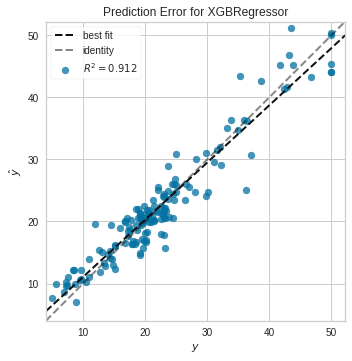

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f961e4ae910>,
                estimator=XGBRegressor())

Residuals Plot


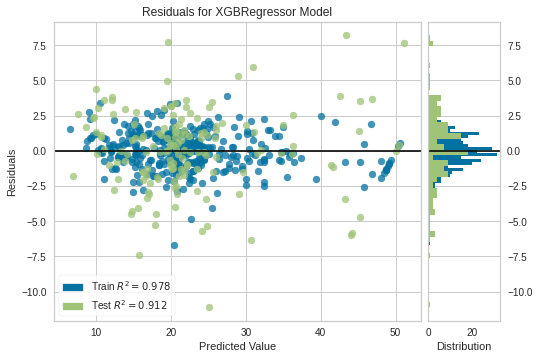

In [44]:
# build the model
xgb_reg = XGBRegressor()

xgb_reg.fit(X_train_Reg, y_train_Reg)

# predict the results
y_pred_Reg=xgb_reg.predict(X_test_Reg)

# Model Evaluation
print("**********************************")
print('R^2:',r2_score(y_test_Reg, y_pred_Reg))
print("**********************************")
print('Adjusted R^2:',
      1 - (1-r2_score(y_test_Reg, y_pred_Reg))*(len(y_test_Reg)-1)/(len(y_test_Reg)-X_test_Reg.shape[1]-1))
print("**********************************")
print('MAE:',mean_absolute_error(y_test_Reg, y_pred_Reg))
print("**********************************")
print('MSE:',mean_squared_error(y_test_Reg, y_pred_Reg))
print("**********************************")
print('RMSE:',np.sqrt(mean_squared_error(y_test_Reg, y_pred_Reg)))
print("**********************************")

# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xgb_reg, X_train_Reg, y_train_Reg, X_test_Reg, y_test_Reg))

# Making the Residuals Plot
print("\nResiduals Plot")
visualizer = ResidualsPlot(xgb_reg)
visualizer.fit(X_train_Reg , y_train_Reg )  # Fit the training data to the visualizer
visualizer.score(X_test_Reg , y_test_Reg )  # Evaluate the model on the test data
visualizer.show() 

#### XGBoost Pros
1. Less feature engineering required (No need for scaling, normalizing data, can also handle missing values well)
2. Feature importance can be found out(it output importance of each feature, can be used for feature selection)
3. Fast to interpret
4. Outliers have minimal impact.
5. Handles large sized datasets well.
6. Good Execution speed
7. Good model performance
8. Less prone to overfitting

#### XGBoost Cons
1. Difficult interpretation , visualization tough
2. Overfitting possible if parameters not tuned properly.
3. Harder to tune as there are too many hyperparameters.

### Catboost Classifier

****************************************
CatBoost Classifier Model accuracy score: 0.8772
****************************************
Training-set accuracy score: 0.9648
****************************************
Training set score: 0.9648
Test set score: 0.8772
****************************************
Confusion matrix

 [[58 12]
 [ 9 92]]

True Positives(TP) =  58

True Negatives(TN) =  92

False Positives(FP) =  12

False Negatives(FN) =  9
****************************************
****************************************
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        70
           1       0.88      0.91      0.90       101

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171

****************************************


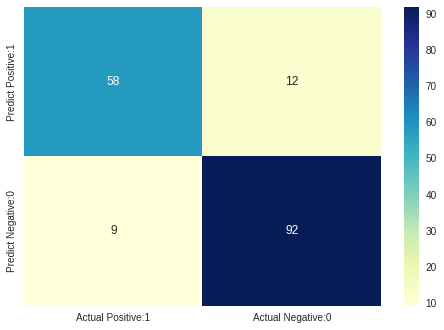

In [45]:
# build the model
clf = CatBoostClassifier(verbose=0, n_estimators=100)
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("****************************************")
print('CatBoost Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print("****************************************")
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print("****************************************")
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))


# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)
print("****************************************")
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print("****************************************")

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print("****************************************")
print(classification_report(y_test, y_pred))
print("****************************************")

### CatBoost Regressor

In [48]:
# build the model
cb_reg = CatBoostRegressor()

cb_reg.fit(X_train_Reg, y_train_Reg)

# predict the results
y_pred_Reg=cb_reg.predict(X_test_Reg)

# Model Evaluation
print("**********************************")
print('R^2:',r2_score(y_test_Reg, y_pred_Reg))
print("**********************************")
print('Adjusted R^2:',
      1 - (1-r2_score(y_test_Reg, y_pred_Reg))*(len(y_test_Reg)-1)/(len(y_test_Reg)-X_test_Reg.shape[1]-1))
print("**********************************")
print('MAE:',mean_absolute_error(y_test_Reg, y_pred_Reg))
print("**********************************")
print('MSE:',mean_squared_error(y_test_Reg, y_pred_Reg))
print("**********************************")
print('RMSE:',np.sqrt(mean_squared_error(y_test_Reg, y_pred_Reg)))
print("**********************************")


Learning rate set to 0.034747
0:	learn: 8.7697307	total: 2.17ms	remaining: 2.17s
1:	learn: 8.5906383	total: 4.39ms	remaining: 2.19s
2:	learn: 8.3971806	total: 6.53ms	remaining: 2.17s
3:	learn: 8.2667041	total: 8.69ms	remaining: 2.16s
4:	learn: 8.1139548	total: 10.9ms	remaining: 2.17s
5:	learn: 7.9963033	total: 13ms	remaining: 2.16s
6:	learn: 7.8452342	total: 15.1ms	remaining: 2.15s
7:	learn: 7.7050342	total: 17.2ms	remaining: 2.14s
8:	learn: 7.5630308	total: 19.3ms	remaining: 2.12s
9:	learn: 7.4177005	total: 21.3ms	remaining: 2.11s
10:	learn: 7.2830103	total: 23.5ms	remaining: 2.11s
11:	learn: 7.1621473	total: 25.8ms	remaining: 2.13s
12:	learn: 7.0370039	total: 28ms	remaining: 2.13s
13:	learn: 6.9142824	total: 30.2ms	remaining: 2.13s
14:	learn: 6.8033059	total: 33.3ms	remaining: 2.19s
15:	learn: 6.6907222	total: 35.5ms	remaining: 2.18s
16:	learn: 6.5808127	total: 37.6ms	remaining: 2.17s
17:	learn: 6.4855659	total: 39.6ms	remaining: 2.16s
18:	learn: 6.3862767	total: 42ms	remaining: 2.17

#### CatBoost Pros

1. Performance: CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.
2. Handling Categorical features automatically: We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. You can read more about it here.
3. Robust: It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. You can read about all these parameters here.
4. Easy-to-use: You can use CatBoost from the command line, using an user-friendly API for both Python and R.

#### CatBoost Cons
1. Catboost’s weaknesses are its training and optimization times.

### LightGBM Classifier

****************************************
LightGBM Classifier Model accuracy score: 0.8772
****************************************
Training-set accuracy score: 1.0000
****************************************
Training set score: 1.0000
Test set score: 0.8772
****************************************
Confusion matrix

 [[59 11]
 [10 91]]

True Positives(TP) =  59

True Negatives(TN) =  91

False Positives(FP) =  11

False Negatives(FN) =  10
****************************************
****************************************
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        70
           1       0.89      0.90      0.90       101

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171

****************************************


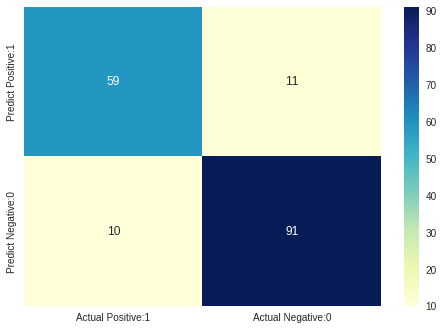

In [49]:
# build the model
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("****************************************")
print('LightGBM Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print("****************************************")
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print("****************************************")

# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("****************************************")

# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print("****************************************")

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print("****************************************")
print(classification_report(y_test, y_pred))
print("****************************************")

### LightGBM Regressor

**********************************
R^2: 0.9155270313538986
**********************************
Adjusted R^2: 0.9075694328582513
**********************************
MAE: 2.132112520283834
**********************************
MSE: 7.977579043275278
**********************************
RMSE: 2.8244608411651377
**********************************

Prediction Error Plot


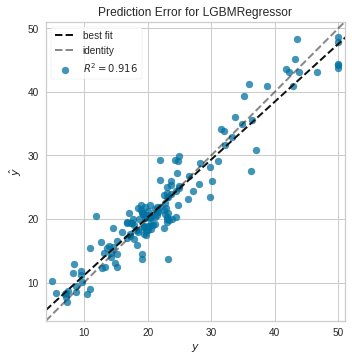

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f961fbb8fd0>,
                estimator=LGBMRegressor())

Residuals Plot


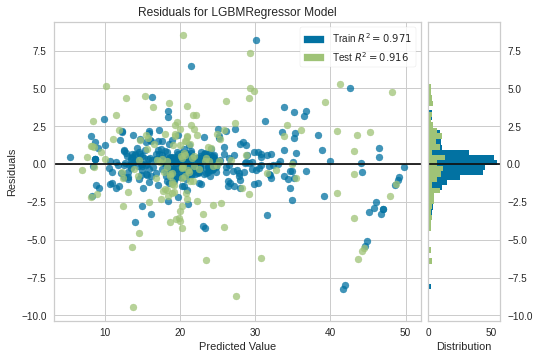

In [50]:
# build the model
lgb_reg = lgb.LGBMRegressor()

lgb_reg.fit(X_train_Reg, y_train_Reg)

# predict the results
y_pred_Reg=lgb_reg.predict(X_test_Reg)

# Model Evaluation
print("**********************************")
print('R^2:',r2_score(y_test_Reg, y_pred_Reg))
print("**********************************")
print('Adjusted R^2:',
      1 - (1-r2_score(y_test_Reg, y_pred_Reg))*(len(y_test_Reg)-1)/(len(y_test_Reg)-X_test_Reg.shape[1]-1))
print("**********************************")
print('MAE:',mean_absolute_error(y_test_Reg, y_pred_Reg))
print("**********************************")
print('MSE:',mean_squared_error(y_test_Reg, y_pred_Reg))
print("**********************************")
print('RMSE:',np.sqrt(mean_squared_error(y_test_Reg, y_pred_Reg)))
print("**********************************")

# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(lgb_reg, X_train_Reg, y_train_Reg, X_test_Reg, y_test_Reg))

# Making the Residuals Plot
print("\nResiduals Plot")
visualizer = ResidualsPlot(lgb_reg)
visualizer.fit(X_train_Reg , y_train_Reg )  # Fit the training data to the visualizer
visualizer.score(X_test_Reg , y_test_Reg )  # Evaluate the model on the test data
visualizer.show() 


#### Advantages of Light GBM
1. Faster training speed and higher efficiency: Light GBM uses a histogram-based algorithm i.e it buckets continuous feature values into discrete bins which fasten the training procedure.
2. Lower memory usage: Replaces continuous values to discrete bins which results in lower memory usage.
3. Better accuracy than any other boosting algorithm: It produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy.
4. Compatibility with Large Datasets: It is capable of performing equally well with large datasets with a significant reduction in training time as compared to XGBoost.

#### Disadvantages of Light GBM
1. Overfitting: Light GBM split the tree leaf-wise which can lead to overfitting as it produces much complex trees.
2. Compatibility with Datasets: Light GBM is sensitive to overfitting and thus can easily overfit small data.

### Random Forest Classifier

****************************************
Random Forest Classifier Model accuracy score: 0.9415
****************************************
****************************************
Training-set accuracy score: 1.0000
****************************************
****************************************
Training set score: 1.0000
Test set score: 0.9415
****************************************
****************************************
Confusion matrix

 [[67  5]
 [ 5 94]]

True Positives(TP) =  67

True Negatives(TN) =  94

False Positives(FP) =  5

False Negatives(FN) =  5
****************************************
****************************************
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        72
           1       0.95      0.95      0.95        99

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

**********************

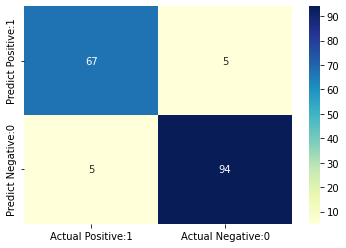

In [62]:
# build the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("****************************************")
print('Random Forest Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print("****************************************")

print("****************************************")
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print("****************************************")

print("****************************************")
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("****************************************")

# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)
print("****************************************")
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print("****************************************")

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print("****************************************")
print(classification_report(y_test, y_pred))
print("****************************************")


#### Advantages and Disadvantages of Random Forest
1. It reduces overfitting in decision trees and helps to improve the accuracy
2. It is flexible to both classification and regression problems
3. It works well with both categorical and continuous values
4. It automates missing values present in the data
5. Normalising of data is not required as it uses a rule-based approach.

#### However, despite these advantages, a random forest algorithm also has some drawbacks.
1. It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
2. It also requires much time for training as it combines a lot of decision trees to determine the class.
3. Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.


### ADA Boost Classifier

****************************************
ADA Boost Model accuracy score: 0.9298
****************************************
****************************************
Training-set accuracy score: 0.9950
****************************************
****************************************
Training set score: 0.9950
Test set score: 0.9298
****************************************
****************************************
Confusion matrix

 [[67  5]
 [ 7 92]]

True Positives(TP) =  67

True Negatives(TN) =  92

False Positives(FP) =  5

False Negatives(FN) =  7
****************************************
****************************************
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        72
           1       0.95      0.93      0.94        99

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

*************************************

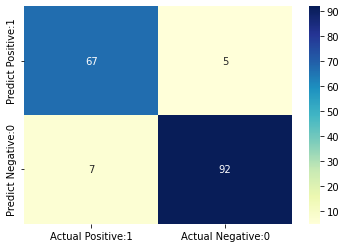

In [58]:
# build the model
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("****************************************")
print('ADA Boost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print("****************************************")

print("****************************************")
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print("****************************************")

print("****************************************")
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("****************************************")

# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)
print("****************************************")
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print("****************************************")

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print("****************************************")
print(classification_report(y_test, y_pred))
print("****************************************")

#### Pros of AdaBoost:
1. Relatively robust to overfitting in low noise datasets
2. AdaBoost has only a few hyperparameters that need to be tuned to improve model performance
3. Easy to understand and to visualize


#### Cons of AdaBoost:
1. The drawback of AdaBoost is that it is easily defeated by noisy data, the efficiency of the algorithm is highly affected by outliers as the algorithm tries to fit every point perfectly.
2. Compared to random forests and XGBoost, AdaBoost performs worse when irrelevant features are included
3. AdaBoost is not optimized for speed

### Decision Tree Classifier

****************************************
Decision Tree Classifier Model accuracy score: 0.9123
****************************************
****************************************
Training-set accuracy score: 1.0000
****************************************
****************************************
Training set score: 1.0000
Test set score: 0.9123
****************************************
****************************************
Confusion matrix

 [[64  8]
 [ 7 92]]

True Positives(TP) =  64

True Negatives(TN) =  92

False Positives(FP) =  8

False Negatives(FN) =  7
****************************************
****************************************
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        72
           1       0.92      0.93      0.92        99

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171

**********************

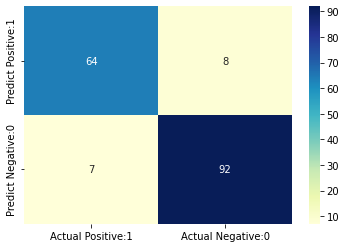

In [66]:
# build the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("****************************************")
print('Decision Tree Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print("****************************************")

print("****************************************")
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print("****************************************")

print("****************************************")
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("****************************************")

# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)
print("****************************************")
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print("****************************************")

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print("****************************************")
print(classification_report(y_test, y_pred))
print("****************************************")

#### Advantages:
1. Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
2. A decision tree does not require normalization of data.
3. A decision tree does not require scaling of data as well.
4. Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
5. A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

#### Disadvantage:
1. A small change in the data can cause a large change in the structure of the decision tree causing instability.
2. For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
3. Decision tree often involves higher time to train the model.
4. Decision tree training is relatively expensive as the complexity and time has taken are more.
5. The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.